In [36]:
#A1
import numpy as np

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
X = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_pixel.npy")
y = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_labelpixel.npy")

# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data):
    correct = 0
    for i in range(len(data)):
        x1, x2 = data[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(data)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, inputs)


Trained Weights:
W0: 1.6999999999999933, W1: -1.6000000000000008, W2: -1.6000000000000005

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 0
Accuracy: 0.0%


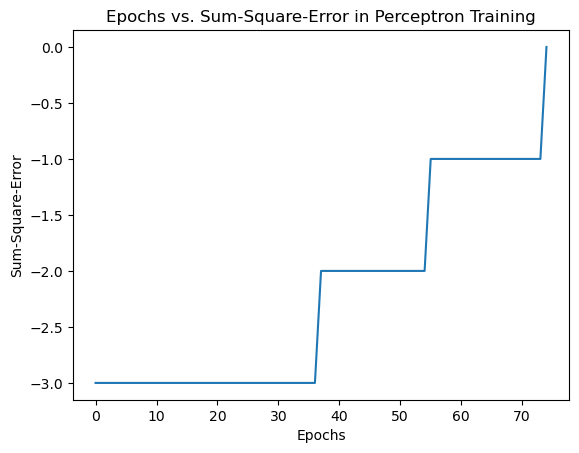

In [14]:
# Plot epochs against error values
plt.plot(range(len(error_values)), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('Epochs vs. Sum-Square-Error in Perceptron Training')
plt.show()


Training with Bi-Polar Step Activation Function:
Trained Weights:
W0: 0.40000000000000246, W1: 0.199999999999999, W2: -0.34999999999999354

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 1
Accuracy: 25.0%
Number of Iterations to Converge: 100


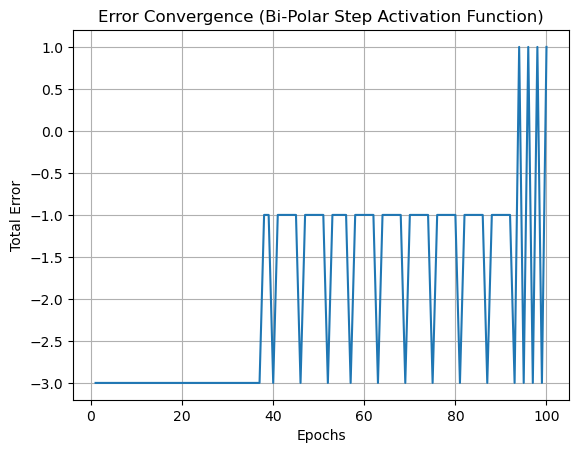


Training with Sigmoid Activation Function:
Trained Weights:
W0: 0.8081759012184128, W1: -0.9991447406092019, W2: -1.482838676567676

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 0
Input: (1, 0), Target: 0, Prediction: 0
Input: (1, 1), Target: 1, Prediction: 0
Accuracy: 50.0%
Number of Iterations to Converge: 100


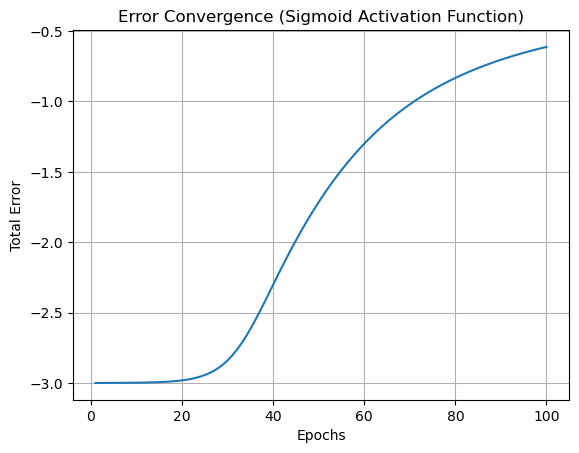


Training with ReLU Activation Function:
Trained Weights:
W0: 0.023949644070226525, W1: 0.30519784086549756, W2: 0.2794981904241313

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 1
Accuracy: 25.0%
Number of Iterations to Converge: 100


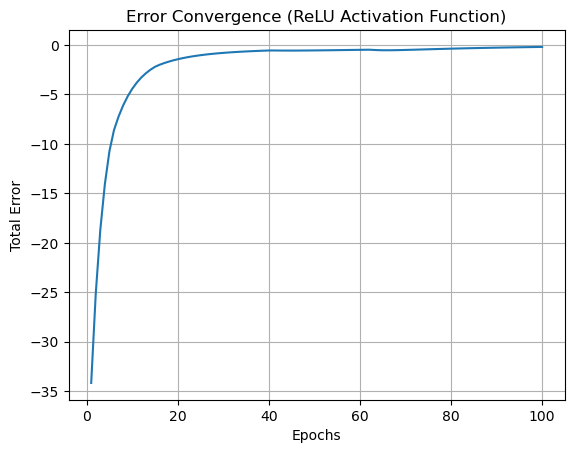

In [18]:
#A2
import numpy as np

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Activation functions
def bi_polar_step_activation(sum):
    return -1 if sum < 0 else 1

def sigmoid_activation(sum):
    return 1 / (1 + np.exp(-sum))

def relu_activation(sum):
    return max(0, sum)

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data, activation_fn):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Apply the selected activation function
            activated_sum = activation_fn(weighted_sum)
            # Calculate the error
            error = target - activated_sum
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Test different activation functions and compare iterations
activation_functions = [("Bi-Polar Step", bi_polar_step_activation),
                        ("Sigmoid", sigmoid_activation),
                        ("ReLU", relu_activation)]

for activation_name, activation_fn in activation_functions:
    print(f"\nTraining with {activation_name} Activation Function:")
    trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, activation_fn)
    print("Trained Weights:")
    print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

    print("\nTesting the Trained Perceptron:")
    test_perceptron(trained_weights, inputs)
    print(f"Number of Iterations to Converge: {len(error_values)}")

    import matplotlib.pyplot as plt
    plt.plot(range(1, len(error_values) + 1), error_values)
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.title(f'Error Convergence ({activation_name} Activation Function)')
    plt.grid(True)
    plt.show()


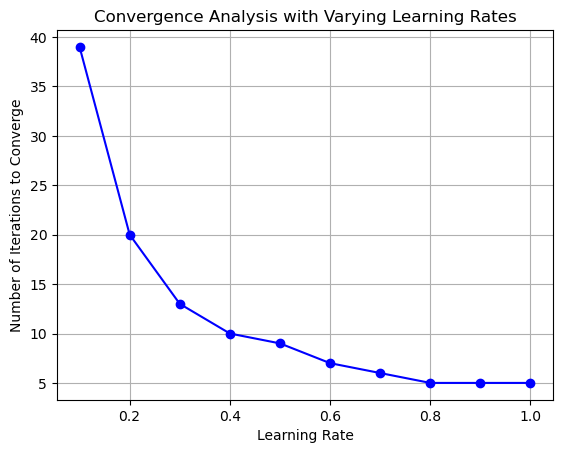

In [19]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights
W0 = 10
W1 = 0.2
W2 = -0.75
X = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_pixel.npy")
y = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_labelpixel.npy")

# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return errors

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iteration_counts = []

for lr in learning_rates:
    # Clone the initial weights to keep them the same for each learning rate
    weights = [W0, W1, W2]
    # Train the perceptron and collect errors
    error_values = train_perceptron(weights, lr, 100, inputs)
    iteration_counts.append(len(error_values))

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iteration_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Convergence Analysis with Varying Learning Rates')
plt.grid(True)
plt.show()


In [12]:
#A4
import numpy as np

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
X = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_pixel.npy")
y = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_labelpixel.npy")

# Training data for XOR gate
# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data):
    correct = 0
    for i in range(len(data)):
        x1, x2 = data[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(data)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, inputs)


Trained Weights:
W0: 3.1499999999999897, W1: -2.1500000000000004, W2: -3.049999999999997

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 75.0%



Training with Bi-Polar Step Activation Function:
Trained Weights:
W0: 5.299999999999982, W1: -2.1000000000000005, W2: -3.049999999999997

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 1
Accuracy: 50.0%
Number of Iterations to Converge: 48


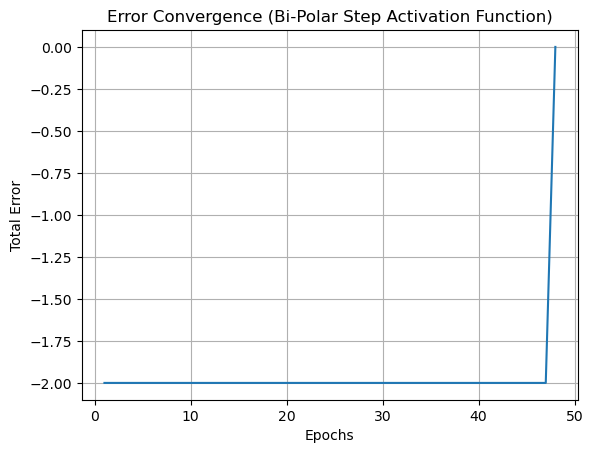


Training with Sigmoid Activation Function:
Trained Weights:
W0: 3.323546657469941, W1: -2.275099695223401, W2: -2.88628340883631

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 75.0%
Number of Iterations to Converge: 100


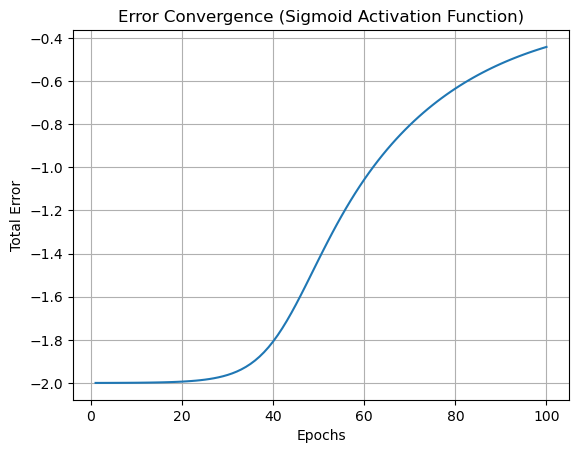


Training with ReLU Activation Function:
Trained Weights:
W0: 0.7965494907504556, W1: -0.2627717682665452, W2: -0.24417908748659964

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 1
Accuracy: 50.0%
Number of Iterations to Converge: 100


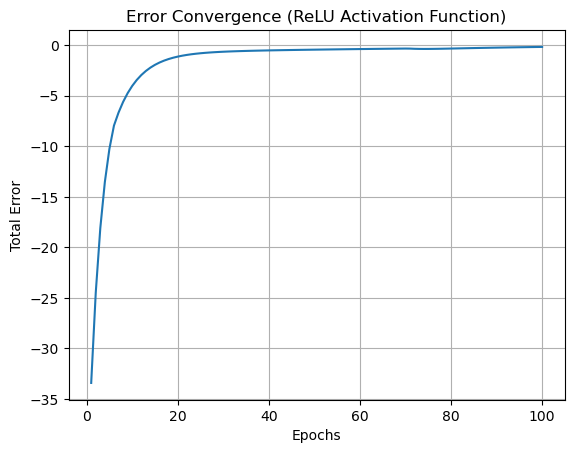

In [20]:
#A4
import numpy as np

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Training data for AND gate
# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

# Activation functions
def bi_polar_step_activation(sum):
    return -1 if sum < 0 else 1

def sigmoid_activation(sum):
    return 1 / (1 + np.exp(-sum))

def relu_activation(sum):
    return max(0, sum)

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data, activation_fn):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Apply the selected activation function
            activated_sum = activation_fn(weighted_sum)
            # Calculate the error
            error = target - activated_sum
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Test different activation functions and compare iterations
activation_functions = [("Bi-Polar Step", bi_polar_step_activation),
                        ("Sigmoid", sigmoid_activation),
                        ("ReLU", relu_activation)]

for activation_name, activation_fn in activation_functions:
    print(f"\nTraining with {activation_name} Activation Function:")
    trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, activation_fn)
    print("Trained Weights:")
    print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

    print("\nTesting the Trained Perceptron:")
    test_perceptron(trained_weights, inputs)
    print(f"Number of Iterations to Converge: {len(error_values)}")

    import matplotlib.pyplot as plt
    plt.plot(range(1, len(error_values) + 1), error_values)
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.title(f'Error Convergence ({activation_name} Activation Function)')
    plt.grid(True)
    plt.show()


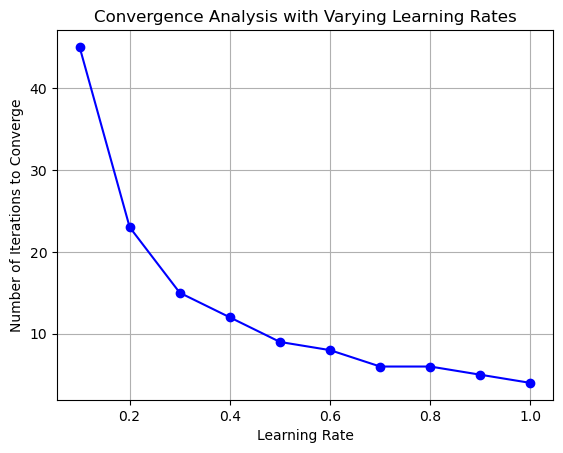

In [21]:
#A4
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights
W0 = 10
W1 = 0.2
W2 = -0.75
X = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_pixel.npy")
y = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_labelpixel.npy")

# Training data for XOR gate
# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return errors

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iteration_counts = []

for lr in learning_rates:
    # Clone the initial weights to keep them the same for each learning rate
    weights = [W0, W1, W2]
    # Train the perceptron and collect errors
    error_values = train_perceptron(weights, lr, 100, inputs)
    iteration_counts.append(len(error_values))

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iteration_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Convergence Analysis with Varying Learning Rates')
plt.grid(True)
plt.show()


In [30]:
#A5
import numpy as np

# Define initial weights and learning rate
W0 = 0.1
W1 = 0.1
W2 = 0.1
W3 = 0.1
learning_rate = 0.1

# Training data
data = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])

# Target values (High Value or Low Value)
targets = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(x1, x2, x3, x4):
    weighted_sum = W0 + W1 * x1 + W2 * x2 + W3 * x3
    return sigmoid(weighted_sum)

def train_perceptron(max_epochs, data, targets):
    global W0, W1, W2, W3  # Declare global variables
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2, x3, x4 = data[i]
            target = targets[i]
            prediction = predict(x1, x2, x3, x4)
            error = target - prediction
            total_error += error
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2
            W3 += learning_rate * error * x3
        if total_error == 0:
            break

# Train the perceptron
train_perceptron(1000, data, targets)

# Test the perceptron and print the results
for i in range(len(data)):
    x1, x2, x3, x4 = data[i]
    prediction = predict(x1, x2, x3, x4)
    classification = "Yes" if prediction >= 0.5 else "No"
    print(f"Customer C_{i + 1}: {classification}")


Customer C_1: Yes
Customer C_2: Yes
Customer C_3: Yes
Customer C_4: No
Customer C_5: Yes
Customer C_6: No
Customer C_7: Yes
Customer C_8: Yes
Customer C_9: No
Customer C_10: No


In [33]:
#A6
# Calculate the pseudo-inverse of the data
pseudo_inverse = np.linalg.pinv(data)
print("Pseudo inverse is",pseudo_inverse)

Pseudo inverse is [[-0.01091325 -0.02143063  0.04786667 -0.00349237  0.02900248  0.03188427
  -0.0465717  -0.02138031  0.02009206 -0.0250572 ]
 [ 0.08980871  0.08198525  0.0676635  -0.12173659 -0.00872926 -0.04996679
   0.01974315  0.01025235 -0.07389006 -0.01513027]
 [ 0.0011809   0.18030851  0.02494649 -0.13764853 -0.0394125   0.07801314
  -0.06996826 -0.05978301  0.00612591  0.01623736]
 [ 0.02503372 -0.29698267 -1.14161729  0.98541657 -0.32413664 -0.61325559
   1.17584324  0.67584995 -0.08036487  0.5942136 ]]
